In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel("calories_burnt_prediction_dataset.xlsx")
df.head()

,Gender,Age,Height_cm,Weight_kg,Duration_min,Heart_Rate,Body_Temp_C,Calories
0,Male,23,162,89,73,148,36.8,457.1
1,Female,23,171,72,94,103,36.6,560.7
2,Male,20,186,45,84,115,39.0,501.3
3,Male,24,182,93,40,178,38.0,340.3
4,Male,25,152,89,32,137,39.6,260.8


In [8]:
df.shape

(1500, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1500 non-null   object 
 1   Age           1500 non-null   int64  
 2   Height_cm     1500 non-null   int64  
 3   Weight_kg     1500 non-null   int64  
 4   Duration_min  1500 non-null   int64  
 5   Heart_Rate    1500 non-null   int64  
 6   Body_Temp_C   1500 non-null   float64
 7   Calories      1500 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 93.9+ KB


In [12]:
df.describe()

,Age,Height_cm,Weight_kg,Duration_min,Heart_Rate,Body_Temp_C,Calories
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,38.634667,169.646000,72.497333,61.969333,124.688667,37.986133,398.266533
std,12.016938,11.456768,15.945433,32.684092,31.572651,1.158935,166.482854
min,18.000000,150.000000,45.000000,5.000000,70.000000,36.000000,55.800000
25%,28.000000,160.000000,59.000000,33.000000,96.750000,37.000000,256.575000
50%,39.000000,170.000000,72.000000,61.000000,125.000000,38.000000,396.250000
75%,49.000000,179.000000,87.000000,91.000000,152.000000,39.000000,539.600000
max,59.000000,189.000000,99.000000,119.000000,179.000000,40.000000,745.100000


In [14]:
df.isnull().sum()


Gender          0
Age             0
Height_cm       0
Weight_kg       0
Duration_min    0
Heart_Rate      0
Body_Temp_C     0
Calories        0
dtype: int64

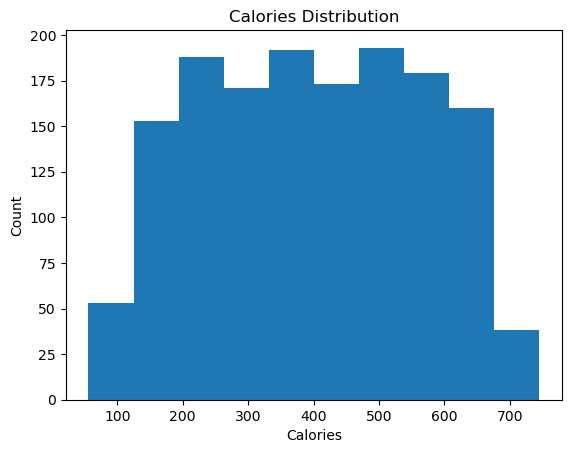

In [16]:
plt.hist(df["Calories"])
plt.xlabel("Calories")
plt.ylabel("Count")
plt.title("Calories Distribution")
plt.show()


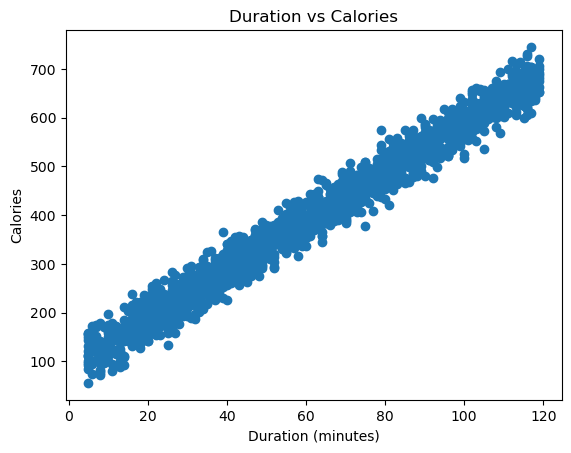

In [18]:
plt.scatter(df["Duration_min"], df["Calories"])
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories")
plt.title("Duration vs Calories")
plt.show()


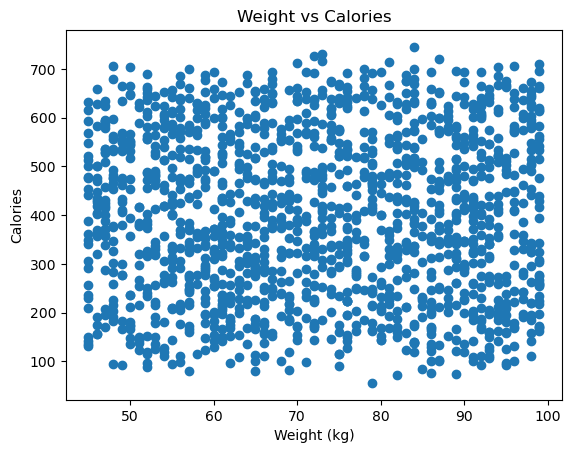

In [20]:
plt.scatter(df["Weight_kg"], df["Calories"])
plt.xlabel("Weight (kg)")
plt.ylabel("Calories")
plt.title("Weight vs Calories")
plt.show()


In [22]:
X = df[["Age", "Weight_kg", "Duration_min"]]
y = df["Calories"]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error:", mae)


R2 Score: 0.9734367022047175
Mean Absolute Error: 22.31933067599153


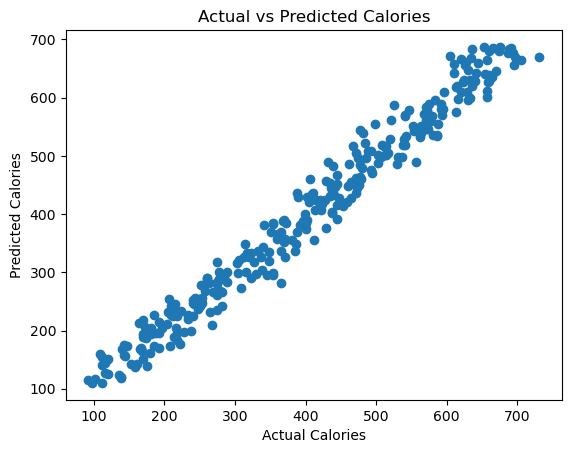

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


In [34]:
# Example: Age=25, Weight=70kg, Duration=40 min
new_data = pd.DataFrame([[25, 70, 40]], columns=["Age", "Weight_kg", "Duration_min"])

predicted_calories = model.predict(new_data)
print("Predicted Calories Burnt:", predicted_calories[0])


Predicted Calories Burnt: 288.2034277243107
